Roger & Shi PDE Boundary Conditions

**Boundary**

$f_{i,0} = \frac{1 - e^{-rT}}{rT} \quad f_{i,M} = 0 $


n_grid: 99
The option price using implicit method is: 0.00033255693597675716


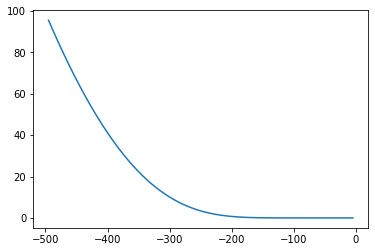

In [16]:
import numpy as np
import scipy as sp
import scipy.sparse as spsp
import scipy.sparse.linalg as spsplg
import matplotlib.pyplot as plt

def RS_Implicit(S,K,r,sigma,T,prt=True):
    year_frac = 5000
    dt = 1/year_frac
    sim_points = int(year_frac *T)

    delta_z = 0.05
    upper_z = 0
    lower_z = -5

    n_grid = int((upper_z - lower_z)/delta_z) - 1
    if prt==True:
        print("n_grid:", n_grid)
    asset_price = np.linspace(lower_z + delta_z, upper_z - delta_z, n_grid)
    po_call = np.maximum(asset_price, 0)

    #implicit method
    def aj(j,r,dt,dz,sigma,T):
      z = lower_z + j*dz
      Aj = (0.5*((1-T*r*z)/(T*dz)) - 0.5*(sigma*z/dz)**2)*dt
      return Aj

    def bj(j,r,dt,dz,sigma,T):
      z = lower_z + j*dz
      Bj = 1 + (dt*(sigma*z/dz)**2)
      return Bj

    def cj(j,r,dt,dz,sigma,T):
      z = lower_z + j*dz
      Cj = -((0.5*(1-r*z*T)/(T*dz) + 0.5*(sigma*z/dz)**2))*dt
      return Cj


    # using sparse matrix methods:

    spg_mat = spsp.diags(
        [[aj(j,r,dt,delta_z,sigma,T) for j in range(2,n_grid+1)],
         [bj(j,r,dt,delta_z,sigma,T) for j in range(1,n_grid+1)],
         [cj(j,r,dt,delta_z,sigma,T) for j in range(1,n_grid)]]
    , [-1,0,1], (n_grid, n_grid)).tocsc()

    imRes = po_call.copy()
    a_1 = aj(1,r,dt,delta_z, sigma,T)
    c_m_1 = cj(n_grid, r, dt, delta_z,sigma,T)

    for i in range(sim_points-1):
      t = (i+1)*dt
      imRes[0] -=  a_1*(1-np.exp(-r*T))/(r*T)
      imRes[-1] -= c_m_1*0
      imRes = spsplg.spsolve(spg_mat, imRes)

    lab="S = "+str(S)
    plt.plot(S*(asset_price), imRes*S, label = "implicit scheme")

    rsKlist = np.round(-S*(asset_price), 10)
    if prt==True:
        print("The option price using implicit method is:",(imRes*S)[np.where(rsKlist==K)][0])

RS_Implicit(S=100,K=95,r=0.02,sigma=0.5,T=1)

**Boundary**

$f_{i,0} = \frac{1-e^{-r(T-t)}}{rT}, \quad f_{i,M}= z_M$

n_grid: 99
The option price using implicit method is: 0.0002839347022374831


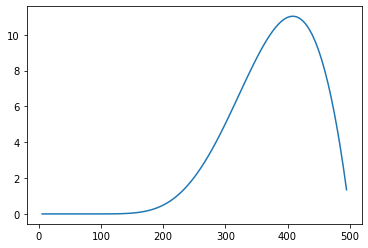

In [17]:
def RS_Implicit(S,K,r,sigma,T,prt=True):
    year_frac = 5000
    dt = 1/year_frac
    sim_points = int(year_frac *T)

    delta_z = 0.05
    upper_z = 0
    lower_z = -5

    n_grid = int((upper_z - lower_z)/delta_z) - 1
    if prt==True:
        print("n_grid:", n_grid)
    asset_price = np.linspace(lower_z + delta_z, upper_z - delta_z, n_grid)
    po_call = np.maximum(asset_price, 0)

    #implicit method
    def aj(j,r,dt,dz,sigma,T):
      z = lower_z + j*dz
      Aj = (0.5*((1-T*r*z)/(T*dz)) - 0.5*(sigma*z/dz)**2)*dt
      return Aj

    def bj(j,r,dt,dz,sigma,T):
      z = lower_z + j*dz
      Bj = 1 + (dt*(sigma*z/dz)**2)
      return Bj

    def cj(j,r,dt,dz,sigma,T):
      z = lower_z + j*dz
      Cj = -((0.5*(1-r*z*T)/(T*dz) + 0.5*(sigma*z/dz)**2))*dt
      return Cj


    # using sparse matrix methods:

    spg_mat = spsp.diags(
        [[aj(j,r,dt,delta_z,sigma,T) for j in range(2,n_grid+1)],
         [bj(j,r,dt,delta_z,sigma,T) for j in range(1,n_grid+1)],
         [cj(j,r,dt,delta_z,sigma,T) for j in range(1,n_grid)]]
    , [-1,0,1], (n_grid, n_grid)).tocsc()

    imRes = po_call.copy()
    a_1 = aj(1,r,dt,delta_z, sigma,T)
    c_m_1 = cj(n_grid, r, dt, delta_z,sigma,T)

    for i in range(sim_points-1):
      t = (i+1)*dt
      imRes[0] -= a_1*(1-np.exp(-r*(T-t)))/(r*T)
      imRes[-1] -= c_m_1*upper_z
      imRes = spsplg.spsolve(spg_mat, imRes)

    lab="S = "+str(S)
    plt.plot(-S*(asset_price), imRes*S, label = "implicit scheme")

    rsKlist = np.round(-S*(asset_price), 10)
    if prt==True:
        print("The option price using implicit method is:",(imRes*S)[np.where(rsKlist==K)][0])

RS_Implicit(S=100,K=95,r=0.02,sigma=0.5,T=1)

n_grid:  99
The option price using Crank Nicolson is: 14.116190577029569


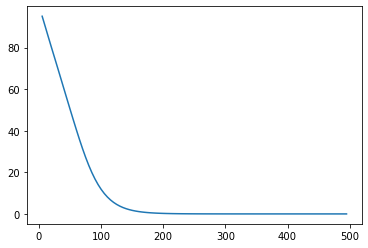

In [21]:
def RS_CN(S,K,r,sigma,T,prt=True):
    year_frac = 5000
    dt = 1/year_frac
    sim_points = int(year_frac *T)

    delta_z = 0.05
    upper_z = 0
    lower_z = -5
    
    n_grid = int((upper_z - lower_z)/delta_z) - 1
    asset_price = np.linspace(lower_z + delta_z, upper_z - delta_z, n_grid)
    po_call = np.maximum(asset_price, 0)
    res = po_call.copy()
    res.reshape((n_grid,1))
    #crank nicolson method

    def cnaj(j, r, dt, dz, sigma, T):
        z = lower_z + j*dz
        cnaj = ((0.25*(z*sigma/dz)**2) - ((1-T*r*z)/(4*T*dz)))*dt
        return cnaj

    def cnbj(j,r,dt,dz,sigma,T):
        z = lower_z + j*dz
        cnbj = 0.5*dt*(sigma*z/dz)**2
        return cnbj

    def cncj(j,r,dt,dz,sigma,T):
        z = lower_z + j*dz
        cncj = dt*((0.25*(z*sigma/dz)**2)+ ((1-r*z*T)/(4*T*dz)))
        return cncj

    cn_mat1 = spsp.diags([[cnaj(j,r,dt, delta_z, sigma,T) for j in range(2,n_grid+1)],
                          [1-cnbj(j,r,dt,delta_z, sigma, T) for j in range(1,n_grid+1)],
                          [cncj(j,r,dt,delta_z, sigma, T) for j in range(1, n_grid)]], [-1,0,1], (n_grid, n_grid)).todense()

    cn_mat2 = spsp.diags([[-cnaj(j,r,dt, delta_z, sigma,T) for j in range(2,n_grid+1)],
                          [1+cnbj(j,r,dt,delta_z, sigma, T) for j in range(1,n_grid+1)],
                          [-cncj(j,r,dt,delta_z, sigma, T) for j in range(1, n_grid)]], [-1,0,1], (n_grid, n_grid)).tocsc()

    cna_1 = cnaj(1,r,dt,delta_z, sigma, T)
    cnc_m = cncj(n_grid,r,dt,delta_z, sigma, T)

    for i in range(sim_points-1):
        t = (i+1)*dt
        eq1 = np.matmul(cn_mat1, res)
        eq1[0] += cna_1 * 0 + cna_1 * 0
        eq1 = eq1.reshape((n_grid, 1))
        eq1[-1] += cnc_m*(upper_z + t/T) + cnc_m*(upper_z + (t+dt)/T)
        res = spsplg.spsolve(cn_mat2, eq1)

    rsKlist = np.round(-S*(asset_price),3)
  
    if prt==True:
        print("n_grid: ",n_grid)
        print("The option price using Crank Nicolson is:",(res*S)[np.where(rsKlist==K)][0])
    lab="S = "+str(S)
    plt.plot(-S*(asset_price), res*S, label = lab)

RS_CN(S=100,K=95,r=0.02,sigma=0.5,T=1)